In [1]:
!pip install jieba
import pandas as pd
import jieba
from collections import Counter
import matplotlib.pyplot as plt
reports = pd.read_csv('Xiaohongshu.csv', encoding='gbk')
# Setting Chinese fonts to support visualisation
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  


In [2]:
corpus = reports['text'].dropna().tolist()

# segmentation
def segment_text(text):
    return list(jieba.cut(text))

import re
def clean_text(text):
    return re.sub(r'[^\u4e00-\u9fa5]', '', text)
# Segmentation of the corpus
cleaned_corpus = [clean_text(doc) for doc in corpus]
tokenized_corpus = [segment_text(doc) for doc in cleaned_corpus]

print("分词后的语料库:")
for doc in tokenized_corpus:
    print(doc)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\lenovo\AppData\Local\Temp\jieba.cache
Loading model cost 0.309 seconds.
Prefix dict has been built successfully.


分词后的语料库:
['北美', '最后', '一轮', '巡演', '将', '于', '北京', '时间', '明早', '八点', '开始', '霉霉', '话题', '霉霉', '话题', '话题', '话题', '泰勒', '斯威夫特', '话题', '话题']
['早前', '霉霉', '在', '早安', '美国', '发布', '自己', '的', '全新', '场刊', '将', '于', '月', '日', '在', '商店', '独家', '发行', '定价', '为', '美元', '由', '发行', '出版', '全书', '页', '含有', '超张', '包括', '部分', '未', '释出', '的', '巡演', '现场', '及', '幕后', '写真', '以及', '巡演', '故事', '和', '关于', '此次', '盛大', '巡演', '的', '个人', '回忆', '说道', '这', '是', '对', '我', '挚爱', '而', '精彩', '奇妙', '的', '旅程', '的', '正式', '回顾', '感谢', '所有', '到场', '的', '粉丝', '是', '你们', '造就', '了', '时代', '巡演', '的', '成功', '这', '本书', '将', '聚焦', '每个', '伴有', '对', '现场', '及', '幕后', '图', '写下', '的', '注释', '书', '中将', '包含', '独占', '排练', '照', '以及', '乐器', '服装', '舞台', '布景', '和', '设计', '稿', '等', '的', '图片', '粉丝', '通过', '逐帧', '分析', '预告', '视频', '发现', '了', '书', '中', '的', '一些', '小', '细节', '卷首语', '结尾', '为', '加粗', '字体', '场', '售罄', '体育场', '演出', '座', '城市', '个', '大洲', '小时', '演出', '万', '粉丝', '参加', '疑似', '收录', '现场图', '页', '以及', '发行', '日期', '大', '数学家', '写', '在', '最后', '大家',

In [16]:
pip install charset-normalizer


Note: you may need to restart the kernel to use updated packages.


Number of positive emotion words: 2811
Number of negative emotion words: 8277
Number of stop words: 749
正面情感词频: [('音乐', 177), ('喜欢', 70), ('很多', 45), ('知道', 43), ('期待', 43), ('惊喜', 40), ('成为', 35), ('感谢', 32), ('准备', 29), ('希望', 28)]
负面情感词频: [('没有', 79), ('不要', 31), ('错过', 25), ('不是', 24), ('激动', 22), ('不会', 20), ('超过', 18), ('不能', 17), ('无法', 15), ('问题', 15)]


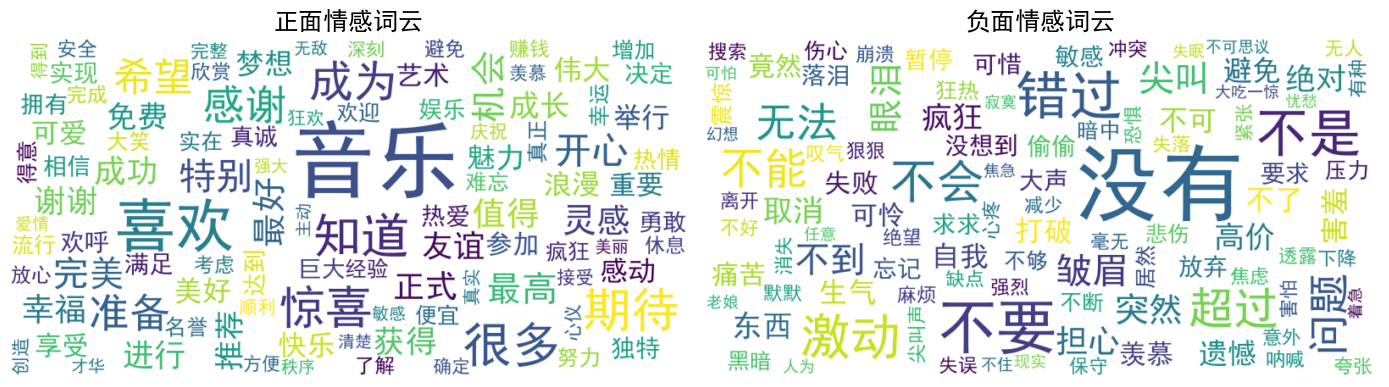

In [3]:
import pandas as pd
import jieba
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Setting Chinese fonts to support visualisation
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# Loading the Emotional Dictionary
def load_emotion_words(file_name, encoding='utf-16'):
    with open(file_name, 'r', encoding=encoding) as f:
        return [line.strip() for line in f]

positive_words = load_emotion_words('NTUSD_positive_simplified.txt')
negative_words = load_emotion_words('NTUSD_negative_simplified.txt')

# Loading the stop word list
def load_stopwords(file_name):
    with open(file_name, 'r', encoding='utf-8') as f:
        return set(line.strip() for line in f)

stopwords = load_stopwords('hit_stopwords.txt')

print("Number of positive emotion words:", len(positive_words))
print("Number of negative emotion words:", len(negative_words))
print("Number of stop words:", len(stopwords))

# text cleaning
def clean_text(text):
    if not isinstance(text, str):
        return ""
    return re.sub(r'[^\u4e00-\u9fa5]', '', text)

# Segmentation
def segment_text(text):
    words = jieba.cut(text)
    return [word for word in words if word not in stopwords and len(word.strip()) > 0]


def extract_emotion_words(text, emotion_words):
    return [word for word in text if word in emotion_words]

reports = pd.read_csv('Xiaohongshu.csv', encoding='gbk')

# Fill null and convert to string
reports['text'] = reports['text'].fillna("").astype(str)

# data preprocessing
reports['cleaned_text'] = reports['text'].apply(clean_text)
reports['tokenized_text'] = reports['cleaned_text'].apply(segment_text)

# Sentiment analysis and count word frequency
positive_counts = Counter()
negative_counts = Counter()

for i, row in reports.iterrows():
    tokenized_text = row['tokenized_text']
    positive_counts.update(extract_emotion_words(tokenized_text, positive_words))
    negative_counts.update(extract_emotion_words(tokenized_text, negative_words))

# Print emotion word frequency information
print("正面情感词频:", positive_counts.most_common(10))
print("负面情感词频:", negative_counts.most_common(10))

# Generate positive word clouds
positive_wordcloud = WordCloud(
    font_path='simhei.ttf',
    background_color='white',
    width=800,
    height=400,
    max_words=100, 
    max_font_size=100,
    relative_scaling=0.5
).generate_from_frequencies(positive_counts)

# Generate negative word clouds
negative_wordcloud = WordCloud(
    font_path='simhei.ttf',
    background_color='white',
    width=800,
    height=400,
    max_words=100,
    max_font_size=100,
    relative_scaling=0.5
).generate_from_frequencies(negative_counts)


plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("正面情感词云", fontsize=18)

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("负面情感词云", fontsize=18)

plt.tight_layout()
plt.show()

# Save results to CSV file
reports.to_csv('sentiment_analysis_results.csv', index=False, encoding='utf-8')